# Segmentación de datos de redes sociales. (30 puntos) #

En el archivo “snsdata.csv” se encuentra los términos más utilizados en unos 30.000 perfiles
aleatorios de adolescentes de una red social. Importar el archivo y separar el conjunto de datos en
dos según el género de los usuarios (F y M). En cada uno de los subconjuntos de datos eliminar el
año de graduación ('gradyear'), el género ('gender') y la edad (‘age’). 

Utilizando el algoritmo de k-means identificar el número de segmentos óptimos en los que se divide cada subconjunto de
datos y obtener los valores de los centroides.

In [31]:
import pandas as pd

## Leyendo los datos ##

In [32]:
df = pd.read_csv("snsdata.csv")

In [33]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


## Limpiando los datos ##

In [34]:
df = df.dropna()
df_masc = df[df["gender"] == "M"]
df_fem = df[df["gender"] == "F"]

In [35]:
df_masc = df_masc.drop(["gradyear", "gender", "age"],1)
df_fem = df_fem.drop(["gradyear", "gender", "age"],1)

## Obtener número óptimo de clusters ##

Se va a utilizar el cálculo de silhouette, para así obtener las puntuaciones y ver cuál es el número óptimo de clusters.

In [36]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [37]:
def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plt.plot(range(2, max_k), sillhouette_avgs)
    plt.title(figure_name)

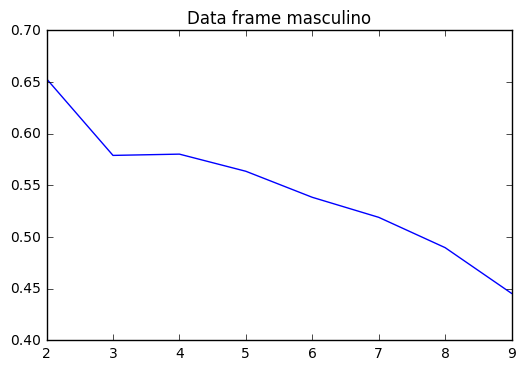

In [38]:
%matplotlib inline
plot_sillhouette(df_masc, 'Data frame masculino')

La gráfica muestra que la mayor puntuación para el subgrupo de chicos se encuentra en dos clusters. 

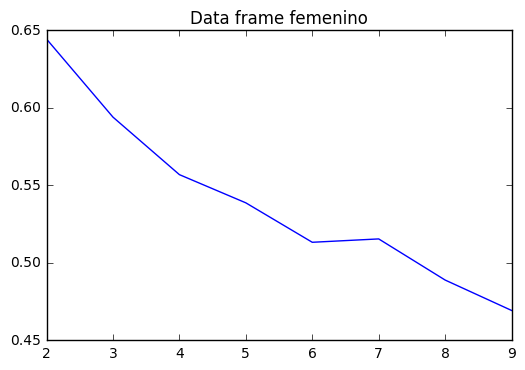

In [51]:
plot_sillhouette(df_fem, 'Data frame femenino')

Al igual que en el de los chicos, en el de las chicas también se observa mayor puntuación en dos clusters. Se comprueba que el algoritmo ha tardado mucho más en chicas que en chicos por la diferencia en cuanto a registros.

In [49]:
print(len(df_masc))
print(len(df_fem))

4694
19311


## Realizando la clusterización ##

In [52]:
kmeans_masc = KMeans(n_clusters = 2).fit(df_masc)
kmeans_fem = KMeans(n_clusters = 2).fit(df_fem)

## Obteniendo los centroides ##

In [53]:
print "Centroides Clusters masculinos: " + str(kmeans_masc.cluster_centers_)

Centroides Clusters masculinos: [[  1.38200947e+01   3.00368227e-01   4.56338769e-01   2.00946870e-01
    7.10152551e-03   3.20883745e-02   7.44345082e-02   7.89058390e-03
    2.55917938e-01   9.12677538e-02   2.05155181e-01   6.57548659e-02
    1.61230931e-01   7.73277223e-02   4.94476591e-02   5.49710679e-02
    1.89110994e-01   3.34560757e-01   4.41872699e-02   6.68069437e-01
    2.38558653e-01   4.07154129e-01   1.87795897e-01   1.14413467e-01
    2.44608101e-02   1.71488690e-01   2.97211994e-02   1.92004208e-02
    1.27301420e-01   4.55023672e-02   6.97001578e-02   3.10362967e-02
    2.20936349e-02   1.72014729e-01   9.62651236e-02   6.89110994e-02
    5.44450289e-02]
 [  7.26053812e+01   3.65470852e-01   4.39461883e-01   2.47757848e-01
    1.79372197e-02   4.59641256e-02   8.29596413e-02   6.72645740e-03
    3.81165919e-01   1.49103139e-01   1.86098655e-01   8.63228700e-02
    1.82735426e-01   1.06502242e-01   6.61434978e-02   8.63228700e-02
    2.72421525e-01   4.54035874e-01   

In [54]:
print "Centroides Clusters femeninos: " + str(kmeans_fem.cluster_centers_)

Centroides Clusters femeninos: [[  1.78526832e+01   2.49742002e-01   2.06849845e-01   2.20007740e-01
    1.91240970e-01   1.64602683e-01   1.46671827e-01   1.21194530e-01
    6.61119711e-02   8.52038184e-02   1.30933953e-01   3.75193498e-01
    2.35810114e-01   1.54669763e-01   1.40673375e-01   1.15196078e-01
    4.68911249e-01   3.00116099e-01   4.04411765e-02   7.75348297e-01
    2.49484004e-01   4.64654283e-01   2.54966460e-01   9.94582043e-02
    1.92853457e-02   4.91744066e-01   1.30740454e-01   1.24032508e-01
    2.77928277e-01   4.14925181e-01   1.67956656e-01   7.14654283e-02
    5.19865841e-02   1.90144479e-01   1.20678535e-01   9.55882353e-02
    6.74664603e-02]
 [  9.04441818e+01   3.40950880e-01   2.77646441e-01   2.82374573e-01
    2.66351458e-01   2.08563173e-01   1.72051484e-01   1.79931705e-01
    9.66640399e-02   7.69634883e-02   1.50512214e-01   4.80693459e-01
    2.04360389e-01   1.76516942e-01   1.79669031e-01   1.26346204e-01
    5.70002627e-01   3.05752561e-01   4

# Componentes principales. (35 puntos)# 

En el archivo “concrete.csv” se encuentra los datos de diferentes mezclas de hormigón. Utilizar el
análisis de componentes principales y obtener el número de componentes principales con los que
se puede explicar el 50%, 75% y 90% de la varianza. Obtener el porcentaje de la varianza que
explica la primera componente principal.

In [65]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

In [56]:
df = pd.read_csv("concrete.csv")

In [57]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [66]:
pca      = PCA(n_components = None)
df_pca = pca.fit_transform(df)

for i in range(np.shape(df_pca)[1]):
    print "Varianza explicada con", i + 1, "componentes:", pca.explained_variance_ratio_[range(i + 1)].sum()

Varianza explicada con 1 componentes: 0.324912981545
Varianza explicada con 2 componentes: 0.572433128251
Varianza explicada con 3 componentes: 0.756005146663
Varianza explicada con 4 componentes: 0.863007419816
Varianza explicada con 5 componentes: 0.963442482825
Varianza explicada con 6 componentes: 0.99538827368
Varianza explicada con 7 componentes: 0.997959553583
Varianza explicada con 8 componentes: 0.999716380907
Varianza explicada con 9 componentes: 1.0


Los resultados son los siguientes:

| Número de componentes | Varianza explicada |
|:--:|:--:|
| 1 | 32,40% |
| 2 | 57,24% |
| 3 | 75,60% |
| 4 | 86,30% |
| 5 | 96,34% |
| 6 | 99,54% |
| 7 | 99,79% |
| 8 | 99,97% |
| 9 | 100% |

Por lo tanto:

* El 50% de la varianza se explica con 2 componentes.
* El 75% de la varianza se explica con 3 componentes.
* El 90% de la varianza se explica con 5 componentes.

La primera componente principal explica el 32,40% de la variabilidad.

# Regresión de una función con Theano. (35 puntos) #

## Este ejercicio, por realizarlo en la máquina virtual, está resuelto en un notebook aparte ##